# LEAD SCORING CASE STUDY

In [186]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [187]:
#importing dataset to csv

leads=pd.read_csv("Leads.csv")

In [188]:
# Looking at first few entries

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [189]:
#checking total rows and cols in dataset
leads.shape

(9240, 37)

This dataset has:
- 9240 rows,
- 37 columns

In [190]:
#basic data check
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [191]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [192]:
#check for duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

**No duplicate values in Prospect ID**

In [193]:
#check for duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

**No duplicate values in Lead Number**

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

## EXPLORATORY DATA ANALYSIS

## Data Cleaning & Treatment:

In [194]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [195]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [196]:
#checking null values in each rows

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [197]:
#checking percentage of null values in each column

leads.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [198]:
#dropping cols with more than 40% missing values

cols=leads.columns


for i in cols:
    if((leads[i].isnull().mean()*100) >= 40):
        leads.drop(i, 1, inplace = True)

In [199]:
#checking null values percentage

leads.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

## Categorical Attributes Analysis:

In [200]:
#checking value counts of Country column

leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

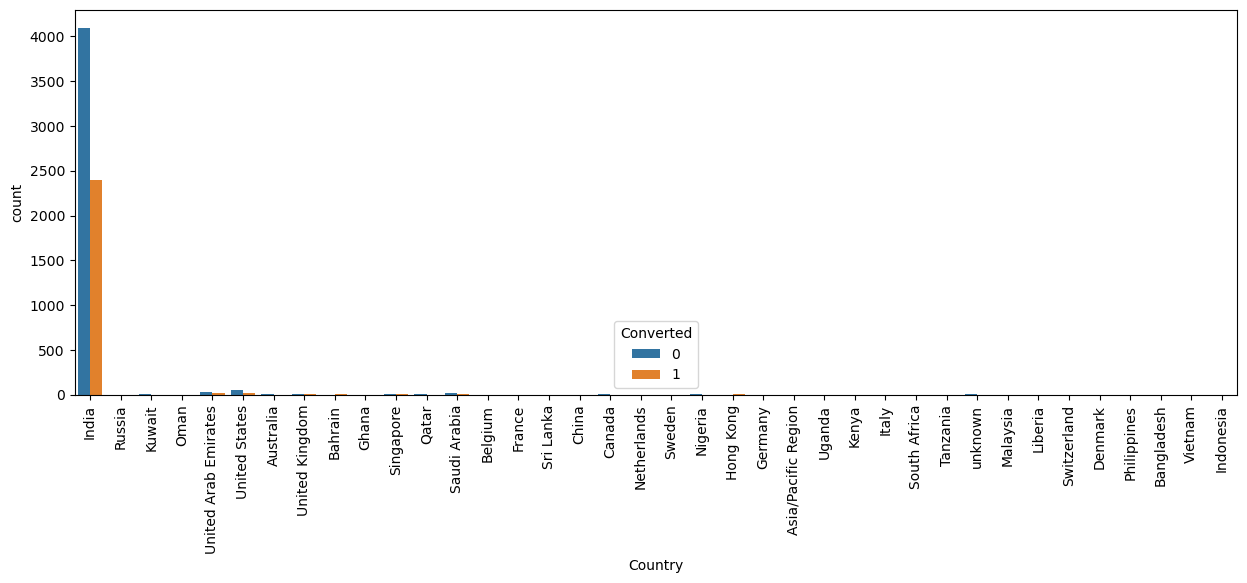

In [201]:
#plotting spread of Country columnn
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [202]:
# # Imputing missing values in Country column with "'not provided"

leads['Country'] = leads['Country'].replace(np.nan,'Not Provided')

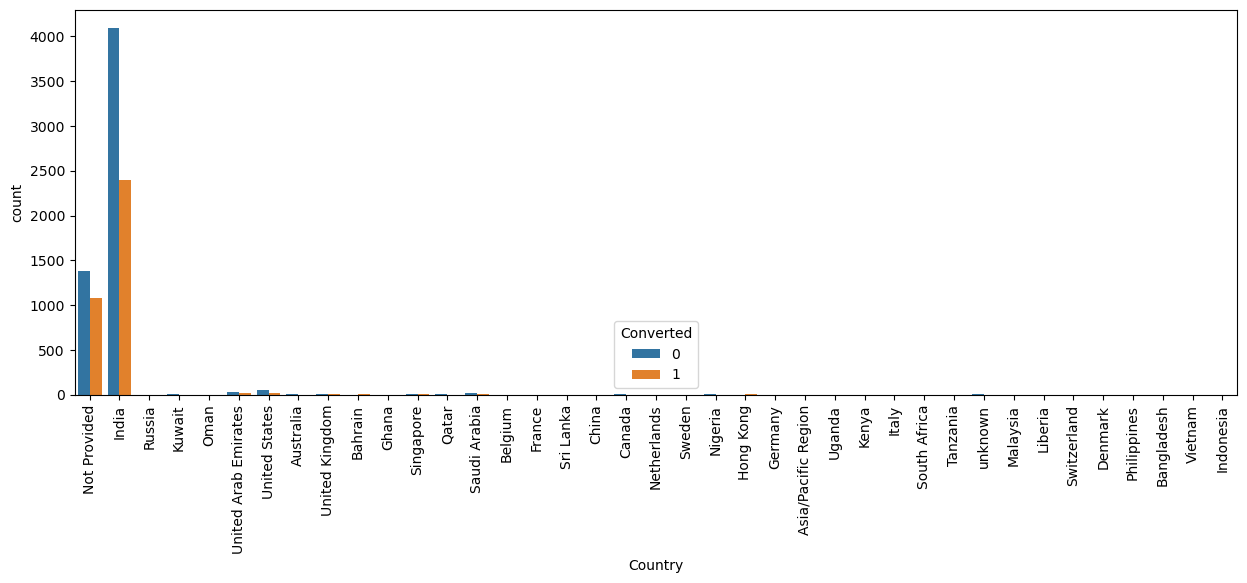

In [203]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped**

In [204]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [205]:
#checking value counts of "City" column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [206]:
leads['City'] = leads['City'].replace(np.nan,'Not Provided')

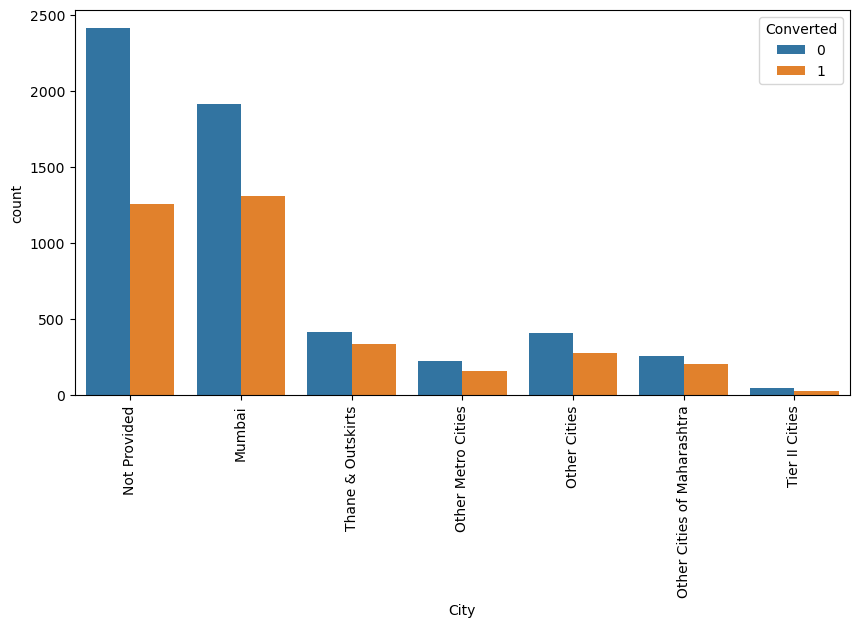

In [207]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [208]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [209]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

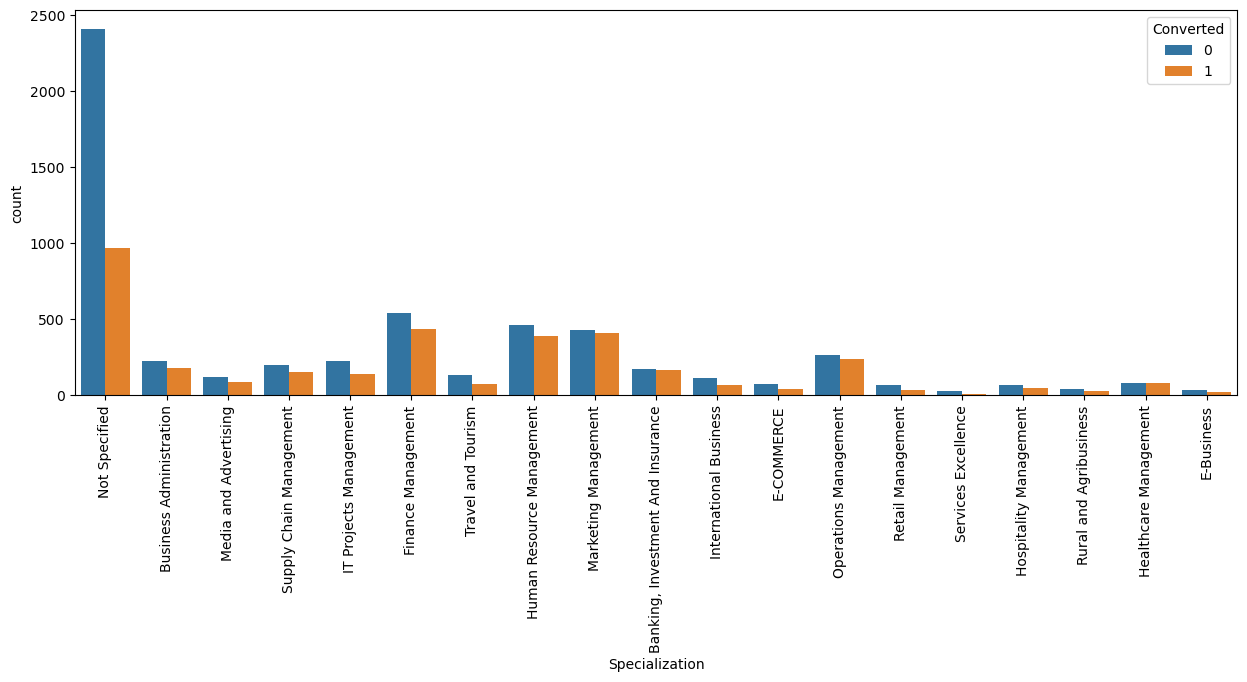

In [210]:
#plotting spread of Specialization columnn

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that specialization with **Management** in them have higher number of leads as well as leads converted.
So this is definitely a significant variable and should not be dropped.

In [211]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

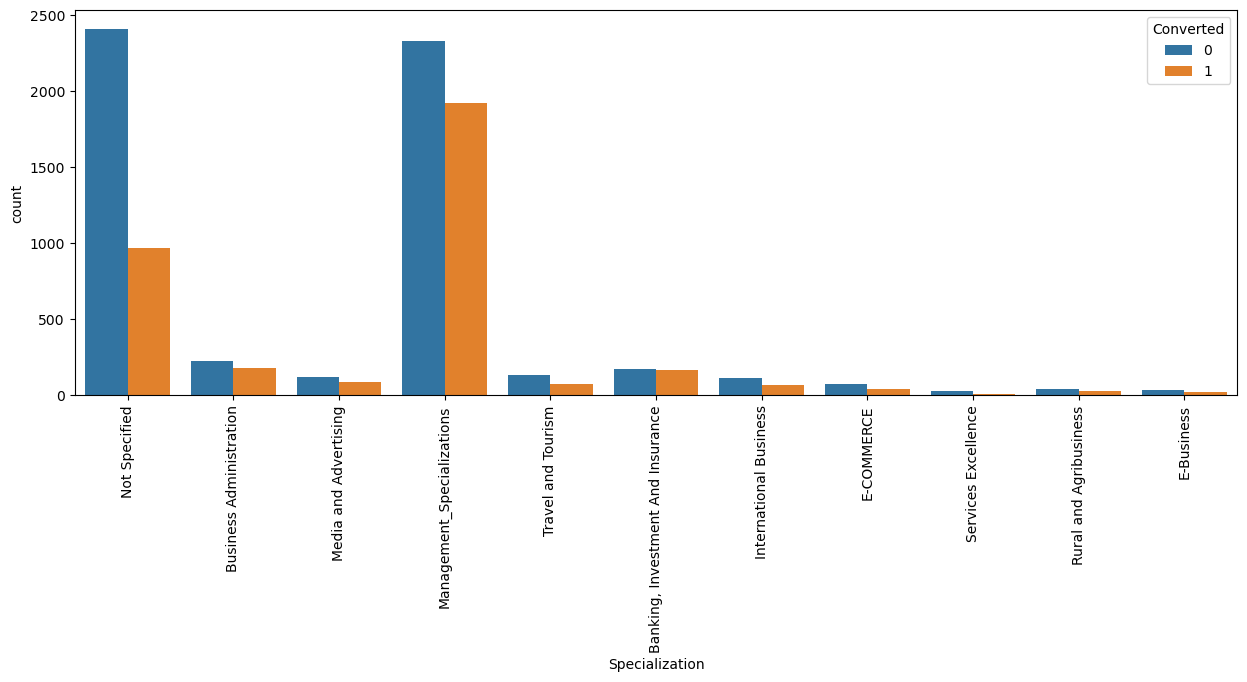

In [212]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [213]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [214]:
#imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'NOt Provided')

In [215]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NOt Provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

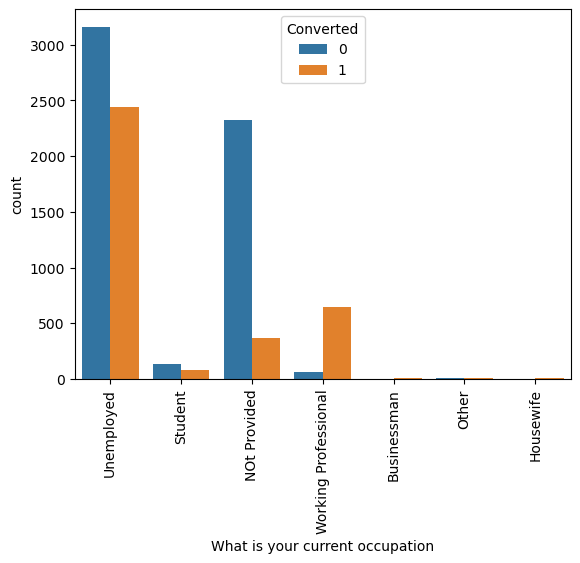

In [216]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers.

In [217]:
#checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [218]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

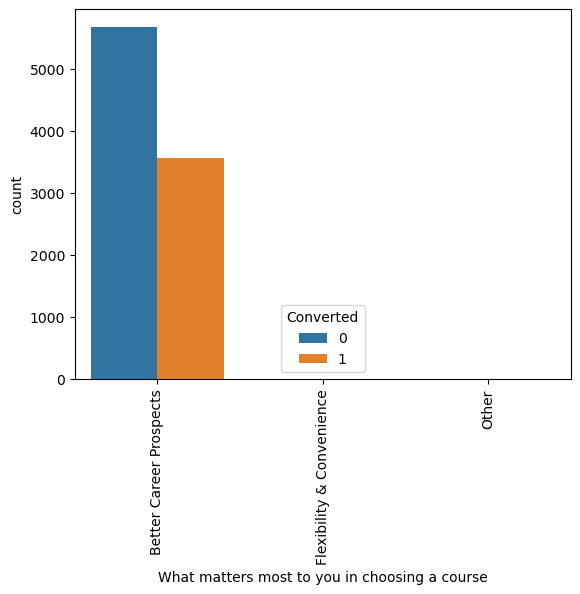

In [219]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [220]:
#checking value counts of variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [221]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [222]:
#checking value counts of Tag variable
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [223]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

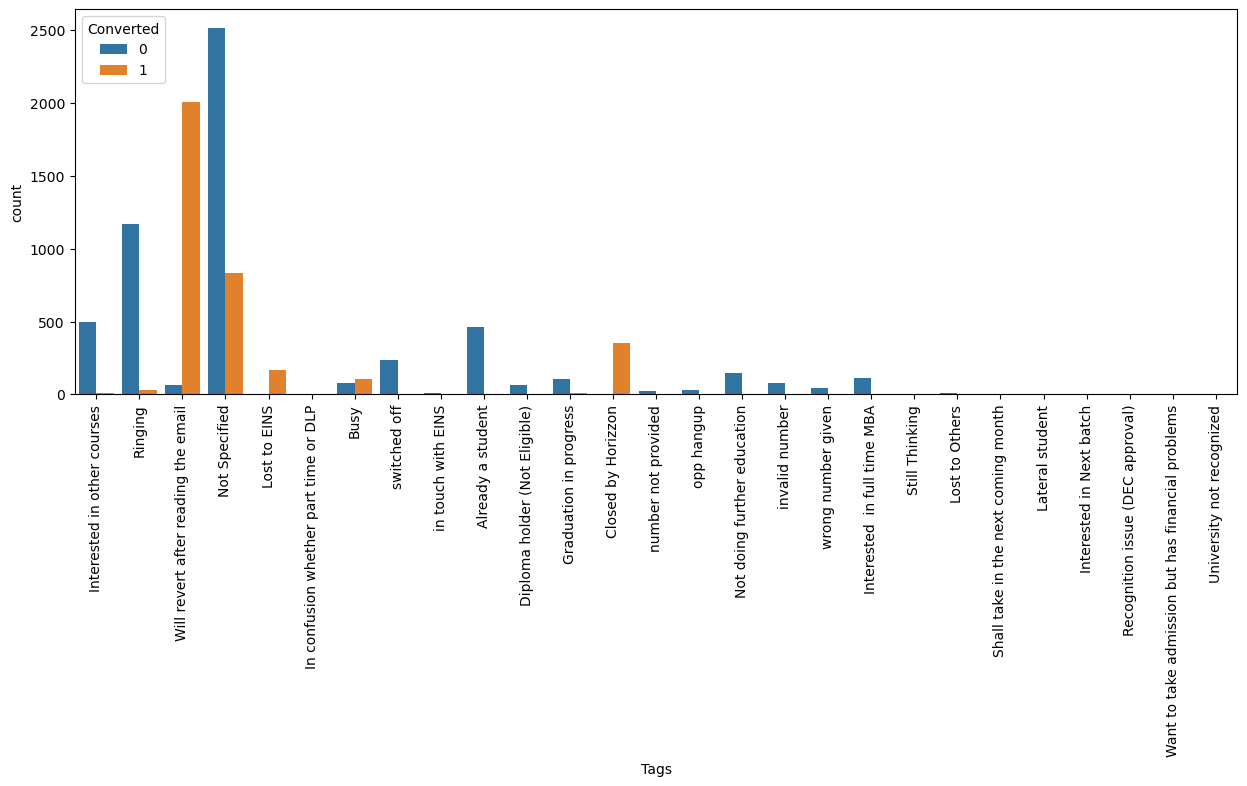

In [224]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [225]:
#replacing tags with low frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [226]:
#checking percentage of missing values
leads.isnull().mean()*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [227]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [228]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

We can group some of the lower frequency occuring labels under a common label 'Others'

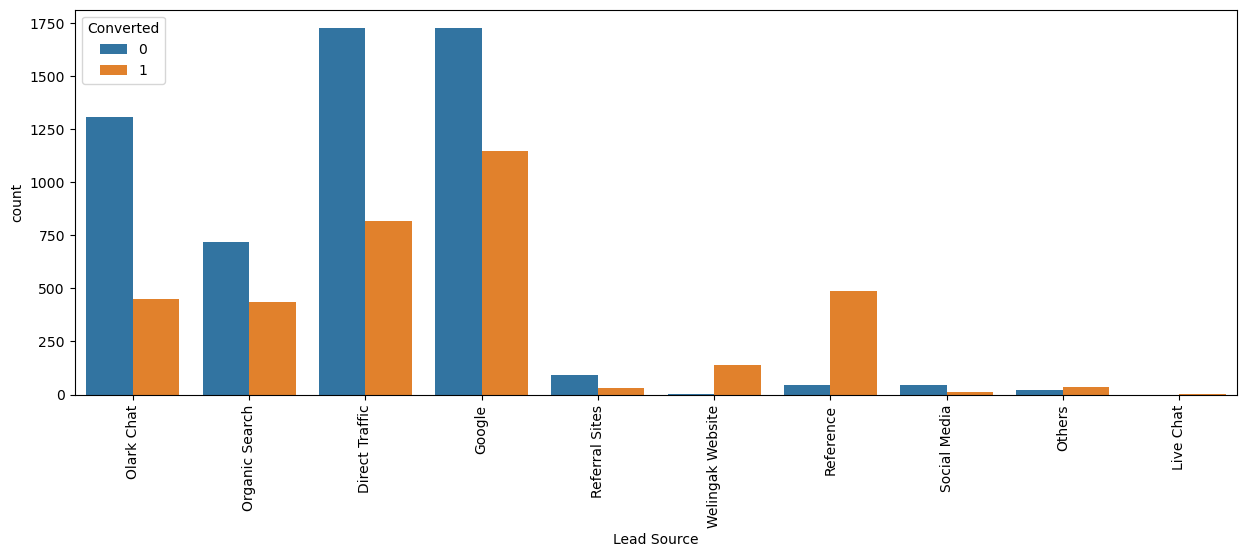

In [229]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
- Maximum number of leads are generated by Google and Direct traffic.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [230]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [231]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation',
                                                        'Approached upfront',
                                                        'View in browser link Clicked',
                                                        'Email Marked Spam',
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [232]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [233]:
#Check the Null Values in All Columns:
leads.isnull().mean()*100

Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [234]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [235]:
#Checking percentage of Null Values in All Columns:
leads.isnull().mean()*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [236]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

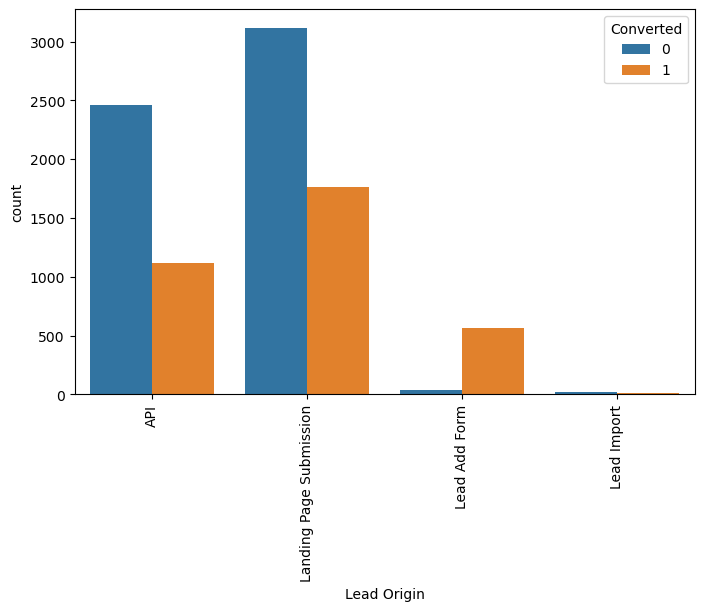

In [237]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get very few leads.
- In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

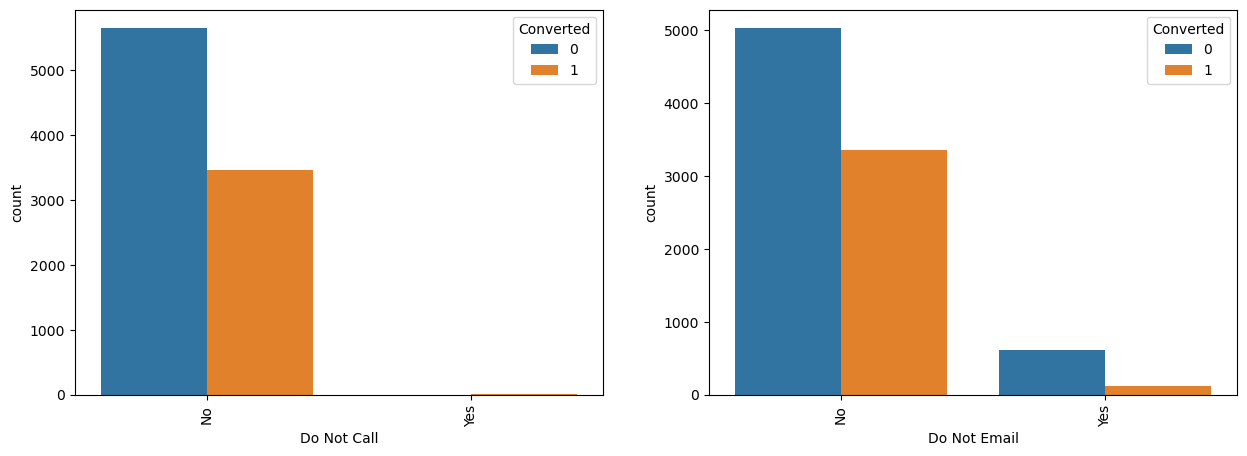

In [238]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [239]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [240]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

We Can append the **Do Not Call** Column to the list of Columns to be Dropped since > 90% is of only one Value

In [241]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

#### IMBALANCED VARIABLES THAT CAN BE DROPPED

In [242]:
leads.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [243]:
leads.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [244]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [245]:
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [246]:
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [247]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [248]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [249]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [250]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [251]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [252]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [253]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [254]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [255]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [256]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront',
                                                                       'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

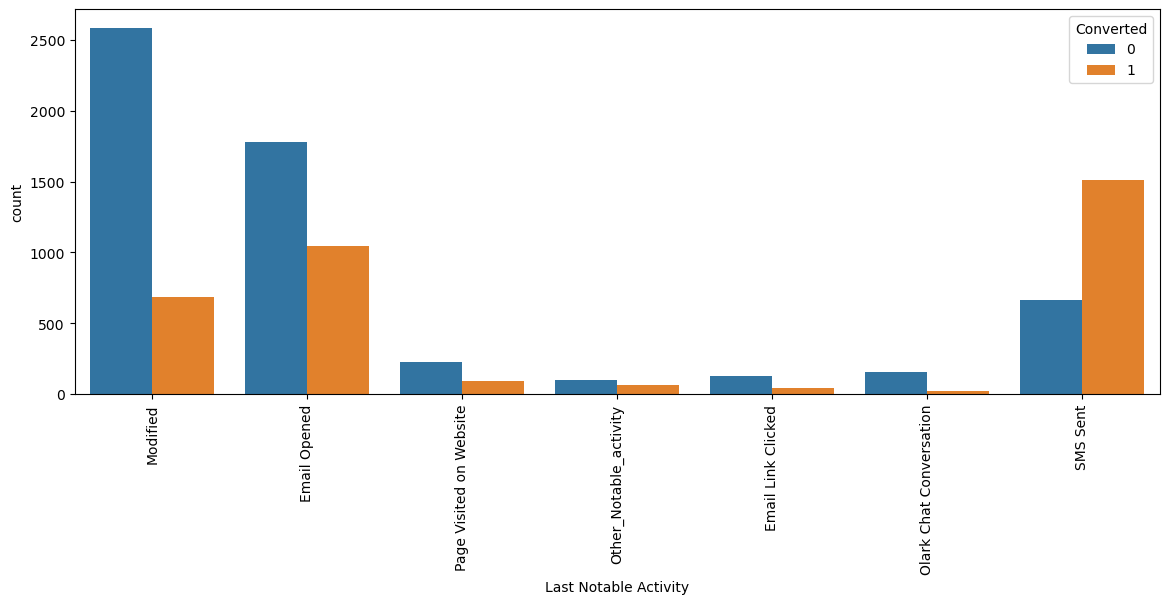

In [257]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [258]:
#checking value counts for variable

leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [259]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [260]:
#dropping columns
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

## Numerical Attributes Analysis:

In [261]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

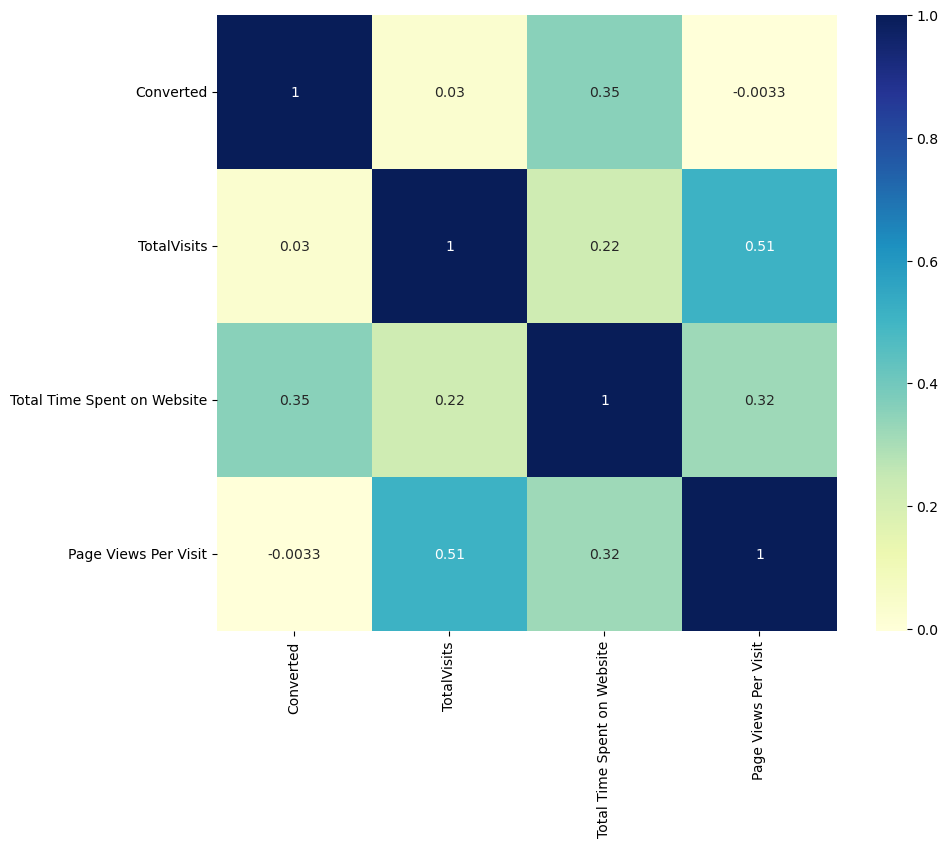

In [262]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

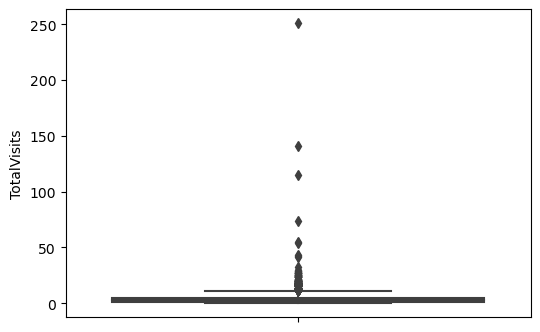

In [263]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

We can see presence of outliers here

In [264]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

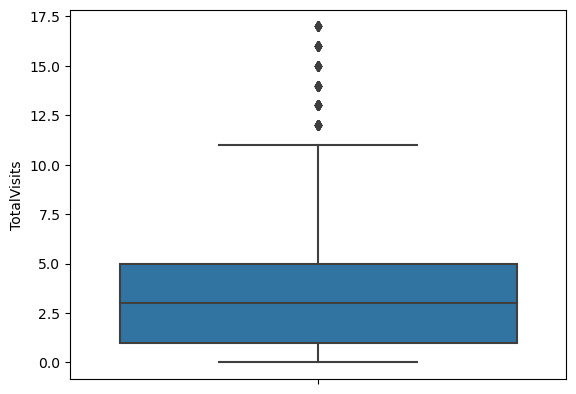

In [265]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [266]:
leads.shape

(9020, 14)

Check for the Next Numerical Column:

In [267]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

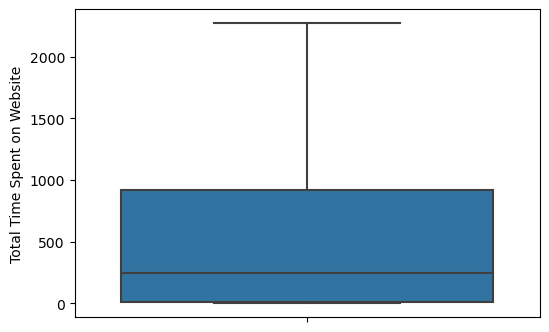

In [268]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

Check for Page Views Per Visit:

In [269]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

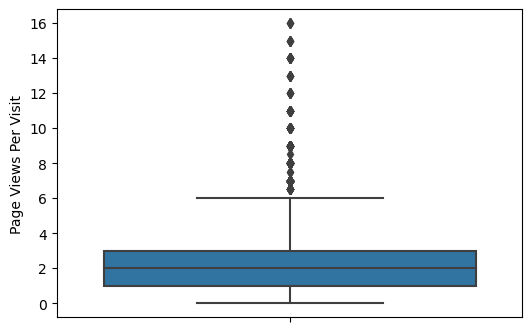

In [270]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

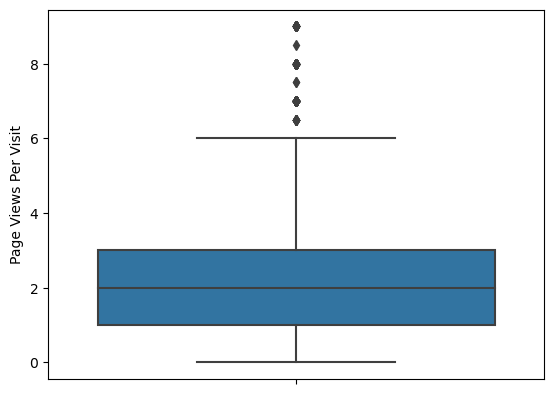

In [271]:
#Outlier Treatment: Remove top & bottom 1%

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [272]:
leads.shape

(8953, 14)

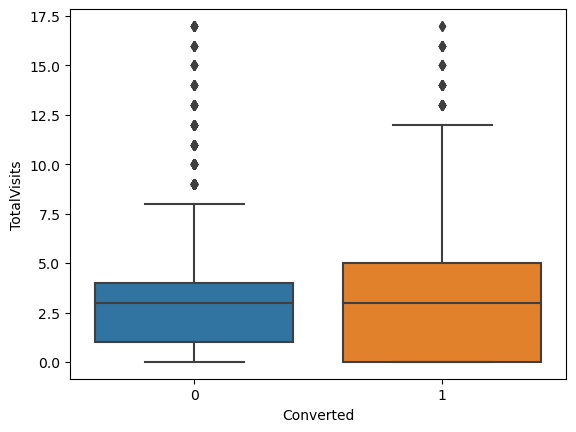

In [273]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

Inference
- Median for converted and not converted leads are the close.
- Nothng conclusive can be said on the basis of Total Visits

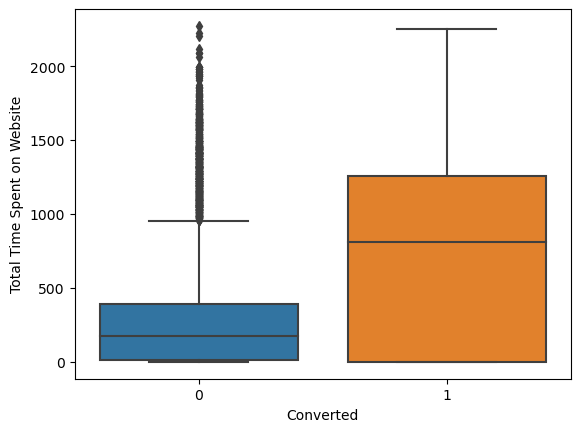

In [274]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Inference
- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

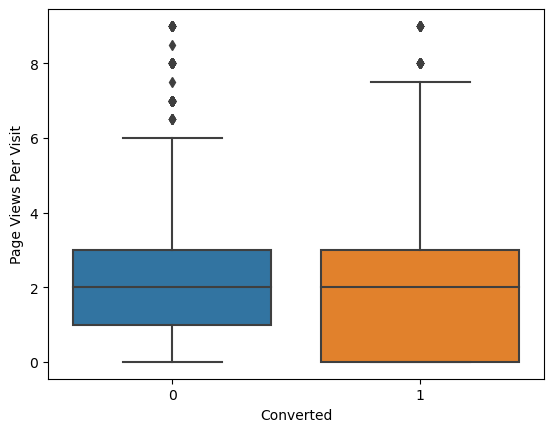

In [275]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

Inference
- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

In [276]:
#checking missing values in leftover columns/

leads.isnull().mean()*100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns to be analyzed further

## Dummy Variable Creation:

In [277]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [278]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [279]:
#getting dummies and dropping the first column and adding the results to the master dataframe

dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [280]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)

leads = pd.concat([leads, dummy], axis = 1)

In [281]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)

leads = pd.concat([leads, dummy], axis = 1)

In [282]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)

leads = pd.concat([leads, dummy], axis = 1)

In [283]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)

leads = pd.concat([leads, dummy], axis = 1)

In [284]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)

leads = pd.concat([leads, dummy], axis = 1)

In [285]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [286]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_NOt Provided,What is your current occupation_Other,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Train-Test Split & Logistic Regression Model Building:

In [287]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [288]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [289]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_NOt Provided          6267 non-null   uint8  
 8   What is your current occupation_Other                 6

### Scaling of Data:

In [290]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_NOt Provided,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Model Building using Stats Model & RFE:

In [291]:
import statsmodels.api as sm

In [292]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)         # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [293]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True])

In [294]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('What is your current occupation_Housewife', False, 14),
 ('What is your current occupation_NOt Provided', True, 1),
 ('What is your current occupation_Other', False, 31),
 ('What is your current occupation_Student', False, 17),
 ('What is your current occupation_Unemployed', False, 15),
 ('What is your current occupation_Working Professional', False, 7),
 ('City_Not Provided', False, 36),
 ('City_Other Cities', False, 19),
 ('City_Other Cities of Maharashtra', False, 26),
 ('City_Other Metro Cities', False, 37),
 ('City_Thane & Outskirts', False, 34),
 ('City_Tier II Cities', False, 13),
 ('Specialization_Banking, Investment And Insurance', False, 9),
 ('Specialization_Business Administration', False, 33),
 ('Specialization_E-Business', False

In [295]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_NOt Provided',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [296]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Not Provided', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and 

#### BUILDING MODEL 1 

In [297]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1094.9
Date:                Tue, 18 Feb 2025   Deviance:                       2189.9
Time:                        02:00:44   Pearson chi2:                 9.17e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6244
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.1637      0.167      6.977      0.000       0.837       1.491
Total Time Spent on Website                       1.0704      0.065     16.494      0.000       0.943       1.198
Lead Origin_Lead Add Form                         0.7656      0.478      1.601      0.109      -0.172       1.703
What is your current occupation_NOt Provided     -2.4331      0.160    -15.236      0.000      -2.746      -2.120
Lead Source_Direct Traffic                       -1.4597      0.188     -7.772      0.000      -1.828      -1.092
Lead Source_Google                               -0.9336      0.172     -5.424      0.000      -1.271      -0.596
Lead Source_Organic Search                       -0.9830      0.216     -4.548      0.000      -1.407      -0.559
Lead Source_Referral Sites                       -0.9687      0.497     -1.949      0.051      -1.943       0.005
Lead Source_Welingak Website                      2.7132      1.124      2.413      0.016       0.509       4.917
Last Activity_Email Bounced                      -1.2093      0.452     -2.678      0.007      -2.095      -0.324
Last Activity_SMS Sent                            2.0629      0.129     16.037      0.000       1.811       2.315
Last Notable Activity_Email Link Clicked         -1.2555      0.507     -2.478      0.013      -2.248      -0.263
Last Notable Activity_Modified                   -1.4286      0.133    -10.751      0.000      -1.689      -1.168
Last Notable Activity_Olark Chat Conversation    -2.3959      0.541     -4.433      0.000      -3.455      -1.336
Tags_Busy                                        -1.1713      0.263     -4.454      0.000      -1.687      -0.656
Tags_Closed by Horizzon                           5.5504      1.029      5.396      0.000       3.534       7.566
Tags_Interested in other courses                 -3.8144      0.429     -8.894      0.000      -4.655      -2.974
Tags_Lost to EINS                                 4.9972      0.631      7.916      0.000       3.760       6.234
Tags_Other_Tags                                  -4.0446      0.247    -16.370      0.000      -4.529      -3.560
Tags_Ringing                                     -5.1361      0.276    -18.621      0.000      -5.677      -4.596
Tags_Will revert after reading the email          2.8699      0.221     12.960      0.000       2.436       3.304
=================================================================================================================
"""

In [298]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Google,2.67
3,Lead Source_Direct Traffic,2.56
2,What is your current occupation_NOt Provided,2.41
19,Tags_Will revert after reading the email,2.26
1,Lead Origin_Lead Add Form,1.97
17,Tags_Other_Tags,1.97
11,Last Notable Activity_Modified,1.93
18,Tags_Ringing,1.78
5,Lead Source_Organic Search,1.65
9,Last Activity_SMS Sent,1.64


p-value of variable Lead Source_Referral Sites is high, so we can drop it.

In [299]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Add Form',1)

#### BUILDING MODEL 2

In [300]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1096.3
Date:                Tue, 18 Feb 2025   Deviance:                       2192.6
Time:                        02:00:45   Pearson chi2:                 9.22e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6242
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.2111      0.164      7.369      0.000       0.889       1.533
Total Time Spent on Website                       1.0716      0.065     16.460      0.000       0.944       1.199
What is your current occupation_NOt Provided     -2.4402      0.160    -15.292      0.000      -2.753      -2.127
Lead Source_Direct Traffic                       -1.5237      0.184     -8.286      0.000      -1.884      -1.163
Lead Source_Google                               -0.9897      0.169     -5.870      0.000      -1.320      -0.659
Lead Source_Organic Search                       -1.0421      0.213     -4.883      0.000      -1.460      -0.624
Lead Source_Referral Sites                       -1.0233      0.498     -2.054      0.040      -2.000      -0.047
Lead Source_Welingak Website                      3.4325      1.030      3.334      0.001       1.414       5.451
Last Activity_Email Bounced                      -1.2169      0.454     -2.681      0.007      -2.107      -0.327
Last Activity_SMS Sent                            2.0770      0.128     16.189      0.000       1.826       2.328
Last Notable Activity_Email Link Clicked         -1.2696      0.504     -2.520      0.012      -2.257      -0.282
Last Notable Activity_Modified                   -1.4414      0.133    -10.850      0.000      -1.702      -1.181
Last Notable Activity_Olark Chat Conversation    -2.4231      0.541     -4.479      0.000      -3.483      -1.363
Tags_Busy                                        -1.1697      0.263     -4.444      0.000      -1.686      -0.654
Tags_Closed by Horizzon                           5.8192      1.018      5.715      0.000       3.823       7.815
Tags_Interested in other courses                 -3.8096      0.430     -8.868      0.000      -4.652      -2.968
Tags_Lost to EINS                                 5.0213      0.631      7.958      0.000       3.785       6.258
Tags_Other_Tags                                  -4.0334      0.247    -16.333      0.000      -4.517      -3.549
Tags_Ringing                                     -5.1153      0.275    -18.570      0.000      -5.655      -4.575
Tags_Will revert after reading the email          2.9394      0.217     13.518      0.000       2.513       3.366
=================================================================================================================
"""

In [301]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Google,2.49
2,Lead Source_Direct Traffic,2.39
1,What is your current occupation_NOt Provided,2.35
10,Last Notable Activity_Modified,1.93
16,Tags_Other_Tags,1.92
18,Tags_Will revert after reading the email,1.86
17,Tags_Ringing,1.73
8,Last Activity_SMS Sent,1.60
4,Lead Source_Organic Search,1.58
0,Total Time Spent on Website,1.41


Since 'All' the Variance Inflation Factor are less we should check the p-value to see if there is any correlation between the variables.
There is a p-value closer to 0.05, we should drop this feature.

In [302]:
#dropping variable with relatively high P-Value

col = col.drop('Lead Source_Referral Sites',1)

#### BUILDING MODEL 3 

In [303]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1098.6
Date:                Tue, 18 Feb 2025   Deviance:                       2197.2
Time:                        02:00:45   Pearson chi2:                 9.25e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6240
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.1476      0.161      7.114      0.000       0.831       1.464
Total Time Spent on Website                       1.0547      0.065     16.335      0.000       0.928       1.181
What is your current occupation_NOt Provided     -2.4564      0.159    -15.418      0.000      -2.769      -2.144
Lead Source_Direct Traffic                       -1.4455      0.180     -8.027      0.000      -1.798      -1.093
Lead Source_Google                               -0.9097      0.164     -5.532      0.000      -1.232      -0.587
Lead Source_Organic Search                       -0.9623      0.210     -4.580      0.000      -1.374      -0.551
Lead Source_Welingak Website                      3.4778      1.029      3.378      0.001       1.460       5.495
Last Activity_Email Bounced                      -1.2051      0.454     -2.654      0.008      -2.095      -0.315
Last Activity_SMS Sent                            2.0859      0.128     16.284      0.000       1.835       2.337
Last Notable Activity_Email Link Clicked         -1.2699      0.510     -2.489      0.013      -2.270      -0.270
Last Notable Activity_Modified                   -1.4313      0.133    -10.789      0.000      -1.691      -1.171
Last Notable Activity_Olark Chat Conversation    -2.4336      0.542     -4.487      0.000      -3.497      -1.371
Tags_Busy                                        -1.1905      0.262     -4.539      0.000      -1.705      -0.676
Tags_Closed by Horizzon                           5.8283      1.018      5.725      0.000       3.833       7.824
Tags_Interested in other courses                 -3.8911      0.434     -8.974      0.000      -4.741      -3.041
Tags_Lost to EINS                                 5.0308      0.631      7.977      0.000       3.795       6.267
Tags_Other_Tags                                  -4.0453      0.247    -16.401      0.000      -4.529      -3.562
Tags_Ringing                                     -5.1188      0.275    -18.610      0.000      -5.658      -4.580
Tags_Will revert after reading the email          2.9211      0.217     13.486      0.000       2.497       3.346
=================================================================================================================
"""

In [304]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Google,2.40
2,Lead Source_Direct Traffic,2.32
1,What is your current occupation_NOt Provided,2.27
9,Last Notable Activity_Modified,1.93
15,Tags_Other_Tags,1.88
17,Tags_Will revert after reading the email,1.82
16,Tags_Ringing,1.68
7,Last Activity_SMS Sent,1.60
4,Lead Source_Organic Search,1.54
0,Total Time Spent on Website,1.39


#### BUILDING MODEL 4 

In [305]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1098.6
Date:                Tue, 18 Feb 2025   Deviance:                       2197.2
Time:                        02:00:45   Pearson chi2:                 9.25e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6240
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.1476      0.161      7.114      0.000       0.831       1.464
Total Time Spent on Website                       1.0547      0.065     16.335      0.000       0.928       1.181
What is your current occupation_NOt Provided     -2.4564      0.159    -15.418      0.000      -2.769      -2.144
Lead Source_Direct Traffic                       -1.4455      0.180     -8.027      0.000      -1.798      -1.093
Lead Source_Google                               -0.9097      0.164     -5.532      0.000      -1.232      -0.587
Lead Source_Organic Search                       -0.9623      0.210     -4.580      0.000      -1.374      -0.551
Lead Source_Welingak Website                      3.4778      1.029      3.378      0.001       1.460       5.495
Last Activity_Email Bounced                      -1.2051      0.454     -2.654      0.008      -2.095      -0.315
Last Activity_SMS Sent                            2.0859      0.128     16.284      0.000       1.835       2.337
Last Notable Activity_Email Link Clicked         -1.2699      0.510     -2.489      0.013      -2.270      -0.270
Last Notable Activity_Modified                   -1.4313      0.133    -10.789      0.000      -1.691      -1.171
Last Notable Activity_Olark Chat Conversation    -2.4336      0.542     -4.487      0.000      -3.497      -1.371
Tags_Busy                                        -1.1905      0.262     -4.539      0.000      -1.705      -0.676
Tags_Closed by Horizzon                           5.8283      1.018      5.725      0.000       3.833       7.824
Tags_Interested in other courses                 -3.8911      0.434     -8.974      0.000      -4.741      -3.041
Tags_Lost to EINS                                 5.0308      0.631      7.977      0.000       3.795       6.267
Tags_Other_Tags                                  -4.0453      0.247    -16.401      0.000      -4.529      -3.562
Tags_Ringing                                     -5.1188      0.275    -18.610      0.000      -5.658      -4.580
Tags_Will revert after reading the email          2.9211      0.217     13.486      0.000       2.497       3.346
=================================================================================================================
"""

In [306]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Google,2.40
2,Lead Source_Direct Traffic,2.32
1,What is your current occupation_NOt Provided,2.27
9,Last Notable Activity_Modified,1.93
15,Tags_Other_Tags,1.88
17,Tags_Will revert after reading the email,1.82
16,Tags_Ringing,1.68
7,Last Activity_SMS Sent,1.60
4,Lead Source_Organic Search,1.54
0,Total Time Spent on Website,1.39


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [307]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.300351
4696    0.033226
3274    0.307930
2164    0.005233
1667    0.988864
7024    0.556681
8018    0.009356
778     0.090850
6942    0.005226
4440    0.042932
dtype: float64

In [308]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3003508 , 0.03322552, 0.30793021, 0.00523306, 0.98886376,
       0.55668071, 0.00935627, 0.09085025, 0.00522616, 0.04293243])

In [309]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.300351,9196
1,0,0.033226,4696
2,0,0.307930,3274
3,0,0.005233,2164
4,1,0.988864,1667


In [310]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.300351,9196,0
1,0,0.033226,4696,0
2,0,0.307930,3274,0
3,0,0.005233,2164,0
4,1,0.988864,1667,1


In [311]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3728  154]
 [ 249 2136]]


In [312]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.935694909845221


In [313]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [314]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8955974842767296

In [315]:
# Let us calculate specificity
TN / float(TN+FP)

0.9603297269448737

In [316]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03967027305512622


In [317]:
# positive predictive value
print (TP / float(TP+FP))

0.9327510917030568


In [318]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9373899924566256


### PLOTTING ROC CURVE

In [319]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [320]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

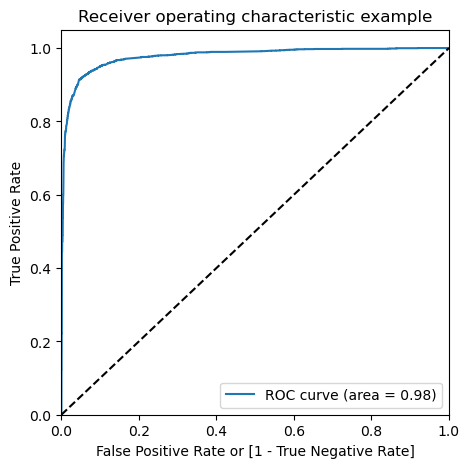

In [321]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [322]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.300351,9196,0,1,1,1,1,0,0,0,0,0,0
1,0,0.033226,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.307930,3274,0,1,1,1,1,0,0,0,0,0,0
3,0,0.005233,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.988864,1667,1,1,1,1,1,1,1,1,1,1,1


In [323]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.886868  0.970650  0.835394
0.2   0.2  0.917664  0.951363  0.896960
0.3   0.3  0.929472  0.935430  0.925811
0.4   0.4  0.936652  0.919916  0.946935
0.5   0.5  0.935695  0.895597  0.960330
0.6   0.6  0.932025  0.867505  0.971664
0.7   0.7  0.926759  0.843187  0.978104
0.8   0.8  0.917824  0.810482  0.983771
0.9   0.9  0.904101  0.763941  0.990211


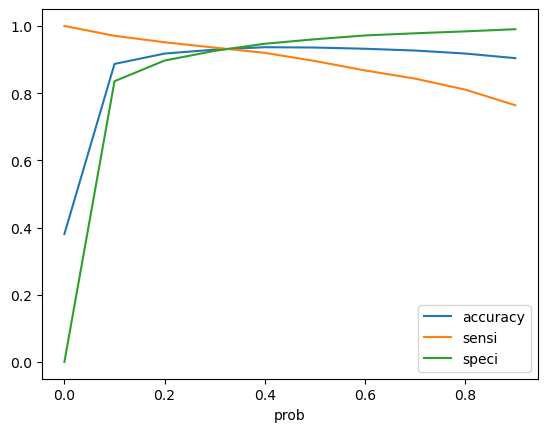

In [324]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [325]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.300351,9196,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.033226,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.307930,3274,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.005233,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.988864,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [326]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.300351,9196,1,30
1,0,0.033226,4696,0,3
2,0,0.307930,3274,1,31
3,0,0.005233,2164,0,1
4,1,0.988864,1667,1,99


In [327]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9294718366044359

In [328]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3594,  288],
       [ 154, 2231]], dtype=int64)

In [329]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [330]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9354297693920336

In [331]:
# Let us calculate specificity
TN / float(TN+FP)

0.9258114374034003

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
- Accuracy : 92.83%
- Sensitivity : 93.41%
- Specificity : 92.47%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [332]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07418856259659969


In [333]:
# Positive predictive value
print (TP / float(TP+FP))

0.8856689162366018


In [334]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9589114194236926


In [335]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3594,  288],
       [ 154, 2231]], dtype=int64)

In [336]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8856689162366018

In [337]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9354297693920336

In [338]:
from sklearn.metrics import precision_recall_curve

In [339]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

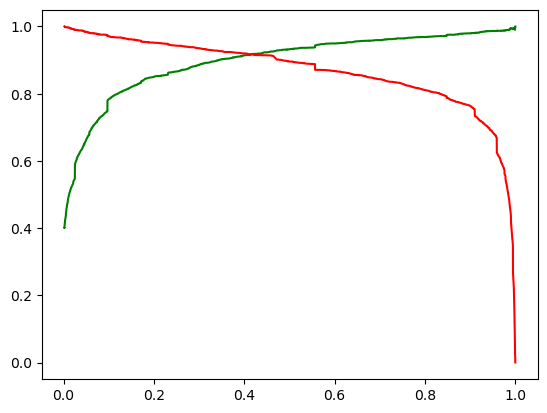

In [340]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [341]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_NOt Provided,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [342]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,What is your current occupation_NOt Provided,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
984,-0.550262,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
8135,0.812462,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6915,-0.628665,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [343]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET

In [344]:
y_test_pred = res.predict(X_test_sm)

In [345]:
y_test_pred[:10]

7681    0.025109
984     0.022191
8135    0.547002
6915    0.003896
2712    0.937879
244     0.002159
4698    0.009438
8287    0.024585
6791    0.979296
8970    0.004536
dtype: float64

In [346]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [347]:
# Let's see the head
y_pred_1.head()

,0
7681,0.025109
984,0.022191
8135,0.547002
6915,0.003896
2712,0.937879


In [348]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [349]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [350]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [351]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [352]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.025109
1,0,984,0.022191
2,0,8135,0.547002
3,0,6915,0.003896
4,1,2712,0.937879


In [353]:
# Renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [354]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.025109
1,0,984,0.022191
2,0,8135,0.547002
3,0,6915,0.003896
4,1,2712,0.937879


In [355]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [356]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.025109,3
1,984,0,0.022191,2
2,8135,0,0.547002,55
3,6915,0,0.003896,0
4,2712,1,0.937879,94


In [357]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [358]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.025109,3,0
1,984,0,0.022191,2,0
2,8135,0,0.547002,55,1
3,6915,0,0.003896,0,0
4,2712,1,0.937879,94,1


In [359]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9374534623976173

In [360]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1564,  112],
       [  56,  954]], dtype=int64)

In [361]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [362]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9445544554455445

In [363]:
# Let us calculate specificity
TN / float(TN+FP)

0.9331742243436754

In [364]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8949343339587242

In [365]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9445544554455445

### Observation:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 93.50%
- Sensitivity : 89.60%
- Specificity : 95.90%

## Final Observation:

Let us compare the values obtained for Train & Test:

### <u> Train Data: </u>
- Accuracy : 93.50%
- Sensitivity : 89.60%
- Specificity : 95.90%
- Precision : 88.56%
- Recall : 93.54%

### <u> Test Data: </u>
- Accuracy : 93.81%
- Sensitivity : 94.75%
- Specificity : 93.25%
- Precision : 89.49%
- Recall : 94.45%